In [25]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from IPython.display import display
from countryinfo import CountryInfo
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_transformer

In [26]:
df = pd.read_csv('income_train.txt')
cols = df.columns
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47,Private,359461,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
26044,31,Private,147215,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States,<=50K
26045,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
26046,50,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,<=50K


In [27]:
df.shape

(26048, 15)

In [28]:
m1 = pd.DataFrame(data = {'types': df.dtypes.values, 'memory': df.memory_usage(deep=True).values[1:]},
            index = df.columns)
display(m1)
print('memory usage was {}'.format((sum(m1.memory))))

,types,memory
age,int64,208384
workclass,object,1689948
fnlwgt,int64,208384
education,object,1704424
education-num,int64,208384
marital-status,object,1860553
occupation,object,1802843
relationship,object,1722159
race,object,1629094
sex,object,1606218


memory usage was 16679214


In [29]:
df[df.select_dtypes(include=['int64', 
                               'float64']).columns] = df[df.select_dtypes(include=
                                                                          ['int64', 'float64']).columns].apply(pd.to_numeric, 
                                                                                                                         downcast="float")

df["workclass"] = df["workclass"].astype("category")
df["education"] = df["education"].astype("category")
df["marital-status"] = df["marital-status"].astype("category")
df["occupation"] = df["occupation"].astype("category")
df["relationship"] = df["relationship"].astype("category")
df["race"] = df["race"].astype("category")
df["sex"] = df["sex"].astype("category")
df["native-country"] = df["native-country"].astype("category")

In [30]:
m2 = pd.DataFrame(data = {'types': df.dtypes.values, 'memory': df.memory_usage(deep=True).values[1:]},
            index = df.columns)
display(m2)
print('memory usage is {}'.format((sum(m1.memory))))
# уменьшение использование памяти в 8 раз
# будет удобно при обучении

,types,memory
age,float32,104192
workclass,category,26949
fnlwgt,float32,104192
education,category,27635
education-num,float32,104192
marital-status,category,26840
occupation,category,27650
relationship,category,26618
race,category,26556
sex,category,26280


memory usage is 16679214


# Preprocess

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             26048 non-null  float32 
 1   workclass       26048 non-null  category
 2   fnlwgt          26048 non-null  float32 
 3   education       26048 non-null  category
 4   education-num   26048 non-null  float32 
 5   marital-status  26048 non-null  category
 6   occupation      26048 non-null  category
 7   relationship    26048 non-null  category
 8   race            26048 non-null  category
 9   sex             26048 non-null  category
 10  capital-gain    26048 non-null  float32 
 11  capital-loss    26048 non-null  float32 
 12  hours-per-week  26048 non-null  float32 
 13  native-country  26048 non-null  category
 14  income          26048 non-null  object  
dtypes: category(8), float32(6), object(1)
memory usage: 1021.6+ KB


In [32]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.576511,1.897595e+05,10.080544,1053.618164,87.988831,40.388554
std,13.642913,1.052327e+05,2.575094,7230.416016,403.577179,12.331894
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782635e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370065e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Target

In [33]:
df.loc[df.income == '>50K', 'income'] = 1
df.loc[df.income == '<=50K', 'income'] = 0
df.income = df.income.astype('category')

### Age

In [34]:
df.age.value_counts().tail(10).sort_index()

79.0    19
80.0    17
81.0    15
82.0     9
83.0     5
84.0     6
85.0     2
86.0     1
87.0     1
88.0     3
Name: age, dtype: int64

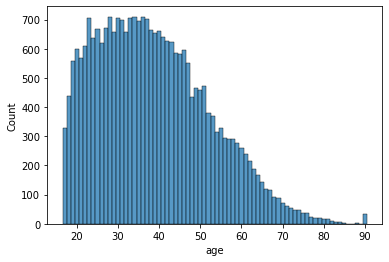

In [35]:
sns.histplot(df.age, discrete = True);
# нужно будет пройтись robust_scaler

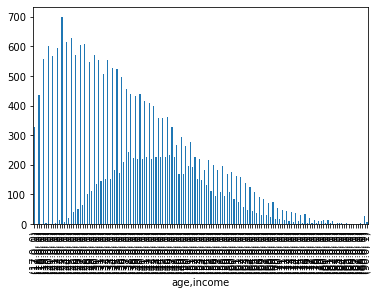

In [36]:
df.groupby(['age', 'income']).count().workclass.plot(kind = 'bar', rot=90);

In [37]:
# bins = [16,23,27,35,47,90]
# for xc in bins:
#     plt.axvline(x=xc+1.5, color='k', linestyle='-')
# sns.histplot(df.age, discrete = True);

In [38]:
# cats_age, bins_age = pd.cut(df.age.values, bins = bins, 
#                     labels = ['1', '2', '3', '4', '5'], retbins = True)
# df.age = cats_age

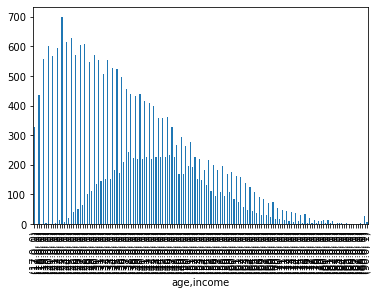

In [39]:
df.groupby(['age', 'income']).count().workclass.plot(kind = 'bar', rot=90);

### Workclass

In [40]:
df.workclass.value_counts()

Private             18118
Self-emp-not-inc     2043
Local-gov            1706
?                    1447
State-gov            1044
Self-emp-inc          904
Federal-gov           769
Without-pay            10
Never-worked            7
Name: workclass, dtype: int64

**'?' в данной таблице == na**

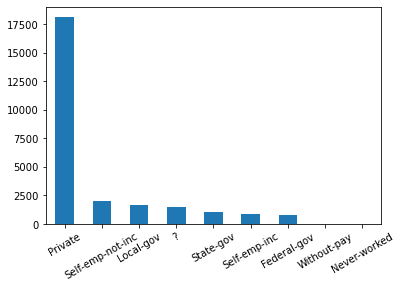

In [41]:
df.workclass.value_counts().plot(kind = 'bar', rot = 30);

In [42]:
# # 1. varik : Классы without pay и never worked сами по себе достаточно небольшие и будут создавать дисбаланс в моделях
df.workclass = ['no money' if value == 'Without-pay' or value == 'Never-worked' else value for value in df.workclass]

In [43]:
# 2. varik:
# df = df.loc[(df.workclass != 'Without-pay') & (df.workclass != 'Never-worked'), :]

### Fnlwgt

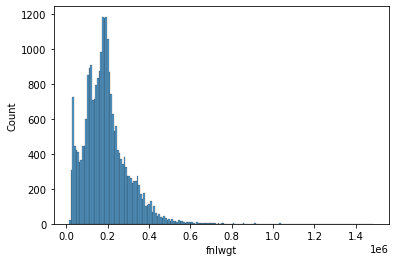

In [44]:
sns.histplot(df.fnlwgt);

In [45]:
df.loc[df.fnlwgt == max(df.fnlwgt), :]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11600,25.0,Private,1484705.0,Some-college,10.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,25.0,United-States,0


In [46]:
# ???? что с этим делать
df.drop('fnlwgt', axis = 1, inplace = True);

### Education

In [47]:
df.education.value_counts()

HS-grad         8416
Some-college    5806
Bachelors       4302
Masters         1354
Assoc-voc       1109
11th             950
Assoc-acdm       869
10th             750
7th-8th          505
Prof-school      460
9th              399
Doctorate        336
12th             335
5th-6th          271
1st-4th          145
Preschool         41
Name: education, dtype: int64

In [48]:
df.groupby(['education', 'income']).count().age

education     income
10th          0          700
              1           50
11th          0          901
              1           49
12th          0          307
              1           28
1st-4th       0          139
              1            6
5th-6th       0          259
              1           12
7th-8th       0          471
              1           34
9th           0          375
              1           24
Assoc-acdm    0          651
              1          218
Assoc-voc     0          811
              1          298
Bachelors     0         2531
              1         1771
Doctorate     0           87
              1          249
HS-grad       0         7086
              1         1330
Masters       0          602
              1          752
Preschool     0           41
              1            0
Prof-school   0          121
              1          339
Some-college  0         4696
              1         1110
Name: age, dtype: int64

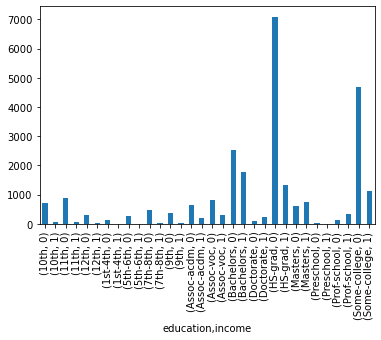

In [49]:
df.groupby(['education', 'income']).count().age.plot(kind = 'bar', rot = 90);

In [50]:
df.education = ['pre-4th' if value == 'Preschool' or value == '1st-4th' else value for value in df.education]
df.education = ['5th-8th' if value == '5th-6th' or value == '7th-8th' else value for value in df.education]
df.education = ['9th-12th' if value == '9th' or value == '10th' or value == '11th' or value == '12th'
                else value for value in df.education]
df.education = ['Assoc' if value == 'Assoc-acdm' or value == 'Assoc-voc' else value for value in df.education]

In [51]:
df.groupby(['education', 'income']).count().age

education     income
5th-8th       0          730
              1           46
9th-12th      0         2283
              1          151
Assoc         0         1462
              1          516
Bachelors     0         2531
              1         1771
Doctorate     0           87
              1          249
HS-grad       0         7086
              1         1330
Masters       0          602
              1          752
Prof-school   0          121
              1          339
Some-college  0         4696
              1         1110
pre-4th       0          180
              1            6
Name: age, dtype: int64

### Education-num

In [52]:
# labeled 'education'
df.drop('education-num', axis = 1, inplace = True)

### Marital Status

In [53]:
df.groupby(['marital-status', 'income']).count().age

marital-status         income
Divorced               0         3163
                       1          360
Married-AF-spouse      0           12
                       1            7
Married-civ-spouse     0         6650
                       1         5376
Married-spouse-absent  0          296
                       1           26
Never-married          0         8169
                       1          388
Separated              0          769
                       1           47
Widowed                0          719
                       1           66
Name: age, dtype: int64

In [54]:
df = df.loc[~(df['marital-status'] == 'Married-AF-spouse'), :]

### Ocupation

In [55]:
df.occupation.value_counts()

Prof-specialty       3311
Craft-repair         3276
Exec-managerial      3228
Adm-clerical         3039
Sales                2919
Other-service        2624
Machine-op-inspct    1624
?                    1452
Transport-moving     1279
Handlers-cleaners    1097
Farming-fishing       800
Tech-support          739
Protective-serv       512
Priv-house-serv       123
Armed-Forces            6
Name: occupation, dtype: int64

In [56]:
df = df.loc[~(df.occupation == 'Armed-Forces'), :]

### Relationship

In [57]:
df.relationship.value_counts()

Husband           10596
Not-in-family      6600
Own-child          4047
Unmarried          2744
Wife               1236
Other-relative      800
Name: relationship, dtype: int64

### Race

In [58]:
df.race.value_counts()

White                 22199
Black                  2523
Asian-Pac-Islander      846
Amer-Indian-Eskimo      239
Other                   216
Name: race, dtype: int64

### Sex

In [59]:
df.sex.value_counts()

Male      17390
Female     8633
Name: sex, dtype: int64

### Capital-gain \ loss

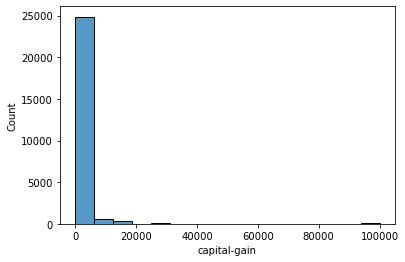

In [60]:
sns.histplot(df['capital-gain']);

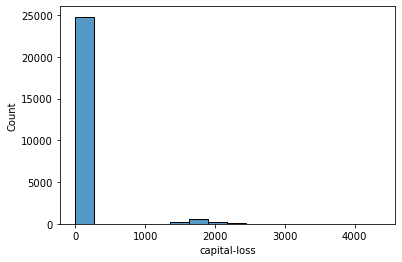

In [61]:
sns.histplot(df['capital-loss']);

In [62]:
df['diff'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace = True);

### Hours-per-week

In [63]:
df['hours-per-week'].value_counts()

40.0    12182
50.0     2259
45.0     1453
60.0     1151
35.0     1062
        ...  
82.0        1
74.0        1
88.0        1
92.0        1
87.0        1
Name: hours-per-week, Length: 93, dtype: int64

In [64]:
# bins = [1,19, 39.5, 40, 60, 100]
# for xc in bins:
#     plt.axvline(x=xc+0.5, color='k', linestyle='--')
# sns.histplot(df['hours-per-week'][df['hours-per-week'] != 40]);

In [65]:
# cats_hours, bins_hours = pd.cut(df['hours-per-week'].values, bins = bins, 
#                     labels = ['1', '2', '3', '4', '5'], retbins = True)
# df['hours-per-week'] = cats_hours

In [66]:
# df.groupby(['hours-per-week', 'income']).count().age

### Native-country

In [67]:
df['native-country'].value_counts()

United-States                 23275
Mexico                          529
?                               458
Philippines                     163
Germany                         105
Canada                           99
Puerto-Rico                      92
El-Salvador                      86
India                            79
Cuba                             76
England                          76
Jamaica                          68
South                            67
Vietnam                          62
Dominican-Republic               62
Italy                            59
China                            57
Columbia                         53
Guatemala                        51
Japan                            51
Poland                           46
Taiwan                           40
Haiti                            38
Iran                             31
Portugal                         31
Nicaragua                        27
Peru                             26
France                      

In [68]:
# Разобьем по регионам
d = dict()
print('Exceptions \n')
for i in df['native-country'].unique():
    try:
        region = CountryInfo(i).region()
        if region in d.keys() : 
            d.update({region:d[region] + [i]})
        else : 
            d[region] = [i]
    except KeyError: 
        print(i)

Exceptions 

United-States
?
Columbia
El-Salvador
South
Dominican-Republic
England
Puerto-Rico
Scotland
Yugoslavia
Trinadad&Tobago
Hong
Outlying-US(Guam-USVI-etc)
Holand-Netherlands


In [69]:
# region = CountryInfo('United States').region()
# d.update({region:d[region] + ['United-States']})
region = CountryInfo('Colombia').region()
d.update({region:d[region] + ['Columbia']})
region = CountryInfo('El Salvador').region()
d.update({region:d[region] + ['El-Salvador']})
#
region = CountryInfo('Dominican Republic').region()
d.update({region:d[region] + ['Dominican-Republic']})
region = CountryInfo('UK').region()
d.update({region:d[region] + ['England']})
region = CountryInfo('Puerto Rico').region()
d.update({region:d[region] + ['Puerto-Rico']})
#
d.update({'Europe': d['Europe'] + ['Scotland']})
d.update({'Europe': d['Europe'] + ['Yugoslavia']})
d.update({'Asia': d['Asia'] + ['Hong']})
# d.update({'?':'?'})
#
region = CountryInfo('Trinidad and Tobago').region()
d.update({region:d[region] + ['Trinadad&Tobago']})
region = CountryInfo('United States').region()
d.update({region:d[region] + ['Outlying-US(Guam-USVI-etc)']})
region = CountryInfo('Netherlands').region()
d.update({region:d[region] + ['Holand-Netherlands']})
print(d)

{'Americas': ['Mexico', 'Cuba', 'Haiti', 'Jamaica', 'Nicaragua', 'Peru', 'Canada', 'Ecuador', 'Guatemala', 'Honduras', 'Columbia', 'El-Salvador', 'Dominican-Republic', 'Puerto-Rico', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)'], 'Asia': ['Philippines', 'India', 'Vietnam', 'Cambodia', 'China', 'Thailand', 'Japan', 'Laos', 'Taiwan', 'Iran', 'Hong'], 'Europe': ['Italy', 'Portugal', 'Ireland', 'France', 'Germany', 'Greece', 'Poland', 'Hungary', 'England', 'Scotland', 'Yugoslavia', 'Holand-Netherlands']}


In [70]:
new_dict = {vi: k  for k, v in d.items() for vi in v}
new_dict['South'] = 'South'
new_dict['United-States'] = 'United-States'
new_dict['?'] = '?'

In [71]:
df['native-country'] = df['native-country'].map(new_dict)

In [72]:
df.groupby(['native-country', 'income']).count().age

native-country  income
?               0           343
                1           115
Americas        0          1146
                1           123
Asia            0           380
                1           158
Europe          0           292
                1           124
South           0            53
                1            14
United-States   0         17546
                1          5729
Name: age, dtype: int64

### Nan\`s

In [73]:
# df = df.replace('?', np.nan).dropna();

In [74]:
# col_with_symbol = ['workclass', 'occupation', 'native-country']
# for col in col_with_symbol:
#     df[col].fillna(df[col].mode()[0], inplace=True)

In [75]:
# # Filling the missing values in Age with the medians of Sex and Pclass groups
# df.workclass = df.groupby(['age'])['workclass'].apply(lambda x: x.fillna(x.mode()))
# df.occupation = df.groupby(['age'])['workclass'].apply(lambda x: x.fillna(x.mode()))
# df['native-country'] = df.groupby(['age'])['workclass'].apply(lambda x: x.fillna(x.mode()))

In [76]:
df.workclass = ['nan' if value == '?' else value for value in df.workclass]
df.occupation = ['nan' if value == '?' else value for value in df.occupation]
df['native-country'] = ['nan' if value == '?' else value for value in df['native-country']]

In [77]:
df.shape

(26023, 12)

### End of data manipulation

# Data preprocessing and modelling

In [78]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,diff
0,33.0,Local-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,50.0,United-States,1,0.0
1,36.0,Private,Assoc,Married-civ-spouse,Exec-managerial,Husband,White,Male,50.0,United-States,1,-1887.0
2,58.0,Self-emp-not-inc,9th-12th,Separated,Craft-repair,Not-in-family,White,Male,40.0,United-States,0,0.0
3,21.0,Private,Assoc,Married-civ-spouse,Farming-fishing,Husband,White,Male,46.0,United-States,0,0.0
4,27.0,Private,Some-college,Divorced,Other-service,Not-in-family,White,Male,40.0,United-States,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47.0,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,40.0,United-States,0,0.0
26044,31.0,Private,9th-12th,Divorced,Other-service,Unmarried,White,Female,21.0,United-States,0,0.0
26045,18.0,Private,9th-12th,Never-married,Adm-clerical,Own-child,White,Female,20.0,United-States,0,0.0
26046,50.0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,84.0,United-States,0,0.0


In [79]:
# ct = ColumnTransformer([
#       ('onehot',
#       OneHotEncoder(), [1,2,3,4,5,6,7,9]),
# #       ('ordinal',
# #       OrdinalEncoder(), [1,3,4,5,6,7,9
# #                         ]),
#        ('scaler',
#        RobustScaler(), [0,8]),
#        ('scaler2',
#        MinMaxScaler(), [10])
#        ])

X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), 
                                                    df['income'], test_size=0.2, random_state = 21)

In [80]:
X_train.shape

(20818, 11)

In [81]:
y_train.shape

(20818,)

In [82]:
cat_col = ['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex' ,'native-country']
num_col = ['age', 'hours-per-week']
trans = make_column_transformer(
    (OneHotEncoder(), cat_col),
    (RobustScaler(), num_col),
    (MinMaxScaler(), ['diff']),
    remainder='drop')

In [83]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# ct.fit(X_train)
# X_train = ct.transform(X_train)
# X_test = ct.transform(X_test)


trans.fit(X_train)
X_train = trans.transform(X_train)
X_test = trans.transform(X_test)

In [84]:
X_train.shape

(20818, 60)

In [85]:
y_train.shape

(20818,)

In [95]:
# knk = KNeighborsClassifier()

# Strat_KFold = StratifiedKFold(n_splits=3, random_state = 42, shuffle = True) 

# n_neighbors = [50,70]
# p = [1, 2, 3,]
# weights = ['uniform', # 'distance'
#           ]
# metrics = [# 'euclidean', 
#            'manhattan']

# params = {'n_neighbors': n_neighbors, "p":p, 
#           "weights":weights, 
#           'metric':metrics}

# grid = GridSearchCV(knk, params, scoring='accuracy', # n_jobs=-1, 
#                     cv=Strat_KFold, return_train_score=True, verbose = 3)
# grid.fit(X_train, y_train)

print("----------------- Обучили и тестировали (knk) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали (knk) -------------------
Наилучшие параметры:
{'metric': 'manhattan', 'n_neighbors': 70, 'p': 1, 'weights': 'uniform'}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.834230

Точность для наилучшей модели на тестовом наборе: 0.828434



In [94]:


# param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[100, 150,200,250,300,400,450],
#              'solver':['lbfgs', 'liblinear', 'sag'], 'l1_ratio':[0.001, 0.01, 0.1],
#              'multi_class': ['ovr', 'multinomial']}

# grid1 = GridSearchCV(LogisticRegression(), 
#                      param_grid=param_grid, verbose=3,cv=Strat_KFold, # n_jobs=-1
#                     )

# grid1.fit(X_train, y_train)

print("----------------- Обучили и тестировали (logistic regression) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid1.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid1.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid1.score(X_test, y_test)))

----------------- Обучили и тестировали (logistic regression) -------------------
Наилучшие параметры:
{'C': 100, 'l1_ratio': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag'}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.847776

Точность для наилучшей модели на тестовом наборе: 0.845725



In [93]:
# rfc=RandomForestClassifier(random_state=42)

# Strat_KFold = StratifiedKFold(n_splits=3, random_state = 42, shuffle = True) 

# param_grid = { 
#     'n_estimators': [40,50,70],
#     'max_features': ['auto', 'log2'],
#     'max_depth' : [14,16,18],
#     'criterion' :['gini','entropy'],
#     'min_samples_split' : [10,12,14],
#     'min_samples_leaf' : [1,2,3],
#     'bootstrap' : [True, False]
# }

# grid3 = GridSearchCV(estimator=rfc, param_grid=param_grid, # n_jobs=-1, 
#                      scoring = 'accuracy', cv=Strat_KFold, verbose = 3)

# grid3.fit(X_train, y_train)

print("----------------- Обучили и тестировали (rangom forest) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid3.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid3.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid3.score(X_test, y_test)))

----------------- Обучили и тестировали (rangom forest) -------------------
Наилучшие параметры:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 50}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.860553

Точность для наилучшей модели на тестовом наборе: 0.862248



In [92]:
# dtc = DecisionTreeClassifier(random_state=42)
# tree_param = {'criterion':['gini','entropy'],
#               'max_depth':[4,7,10,12,15],
#               'splitter': ['best','random'],
#               'max_leaf_nodes': list(range(2, 100)), 
#               'min_samples_split': [1, 2, 3, 4]}


# grid4 = GridSearchCV(estimator=dtc, param_grid=tree_param, #n_jobs=-1, 
#                      scoring = 'accuracy', cv=Strat_KFold, verbose = 3)

# grid4.fit(X_train, y_train)

print("----------------- Обучили и тестировали (Decision Tree) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid4.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid4.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid4.score(X_test, y_test)))

----------------- Обучили и тестировали (Decision Tree) -------------------
Наилучшие параметры:
{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 67, 'min_samples_split': 2, 'splitter': 'best'}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.851619

Точность для наилучшей модели на тестовом наборе: 0.863593



Classification report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3994
           1       0.77      0.59      0.67      1211

    accuracy                           0.86      5205
   macro avg       0.83      0.77      0.79      5205
weighted avg       0.86      0.86      0.86      5205

Confusion matrix



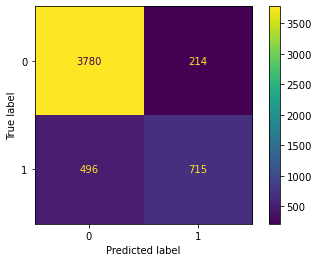

Accuracy score is 0.8636


In [90]:

y_pred = grid4.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               #display_labels=['No', 'Yes']
                             );
disp.plot()
plt.show()
print('Accuracy score is {}'.format(round(accuracy_score(y_test, y_pred),4)))

## FOR TESTING 

**1. read packages** <br>
2. go down

In [14]:
test_df = pd.read_csv('income_train.txt')
df = pd.read_csv('income_train.txt')
# df нужно прочесть для фита и трансформа test_df

**Если в тестовом датасете есть income**

In [15]:
def preprocess(test_df):
    test_df.loc[test_df.income == '>50K', 'income'] = 1
    test_df.loc[test_df.income == '<=50K', 'income'] = 0
    test_df.income = test_df.income.astype('category')
    # # 1. varik : Классы without pay и never worked сами по себе достаточно небольшие и будут создавать дисбаланс в моделях
    test_df.workclass = ['no money' if value == 'Without-pay' or value == 'Never-worked' 
                         else value for value in test_df.workclass]
    # ???? что с этим делать
    test_df.drop('fnlwgt', axis = 1, inplace = True);
    test_df.education = ['pre-4th' if value == 'Preschool' or value == '1st-4th' else value for value in test_df.education]
    test_df.education = ['5th-8th' if value == '5th-6th' or value == '7th-8th' else value for value in test_df.education]
    test_df.education = ['9th-12th' if value == '9th' or value == '10th' or value == '11th' or value == '12th'
                    else value for value in test_df.education]
    test_df.education = ['Assoc' if value == 'Assoc-acdm' or value == 'Assoc-voc' else value for value in test_df.education]
    # labeled 'education'
    test_df.drop('education-num', axis = 1, inplace = True)
    test_df = test_df.loc[~(test_df['marital-status'] == 'Married-AF-spouse'), :]
    test_df = test_df.loc[~(test_df.occupation == 'Armed-Forces'), :]
    test_df['diff'] = test_df['capital-gain'] - test_df['capital-loss']
    test_df.drop(['capital-gain', 'capital-loss'], axis=1, inplace = True);

    # Разобьем по регионам
    d = dict()
    for i in test_df['native-country'].unique():
        try:
            region = CountryInfo(i).region()
            if region in d.keys() : 
                d.update({region:d[region] + [i]})
            else : 
                d[region] = [i]
        except KeyError: 
            pass

    region = CountryInfo('Colombia').region()
    d.update({region:d[region] + ['Columbia']})
    region = CountryInfo('El Salvador').region()
    d.update({region:d[region] + ['El-Salvador']})
    #
    region = CountryInfo('Dominican Republic').region()
    d.update({region:d[region] + ['Dominican-Republic']})
    region = CountryInfo('UK').region()
    d.update({region:d[region] + ['England']})
    region = CountryInfo('Puerto Rico').region()
    d.update({region:d[region] + ['Puerto-Rico']})
    #
    d.update({'Europe': d['Europe'] + ['Scotland']})
    d.update({'Europe': d['Europe'] + ['Yugoslavia']})
    d.update({'Asia': d['Asia'] + ['Hong']})
    #
    region = CountryInfo('Trinidad and Tobago').region()
    d.update({region:d[region] + ['Trinadad&Tobago']})
    region = CountryInfo('United States').region()
    d.update({region:d[region] + ['Outlying-US(Guam-USVI-etc)']})
    region = CountryInfo('Netherlands').region()
    d.update({region:d[region] + ['Holand-Netherlands']})

    new_dict = {vi: k  for k, v in d.items() for vi in v}
    new_dict['South'] = 'South'
    new_dict['United-States'] = 'United-States'
    new_dict['?'] = '?'
    test_df['native-country'] = test_df['native-country'].map(new_dict)
    return test_df

**Если в тестовом датасете нет income**<br>
(Тогда весь test_df является тестовой выборкой - X_test)

In [16]:
def preprocess1(test_df):
    # # 1. varik : Классы without pay и never worked сами по себе достаточно небольшие и будут создавать дисбаланс в моделях
    test_df.workclass = ['no money' if value == 'Without-pay' or value == 'Never-worked' 
                         else value for value in test_df.workclass]
    # ???? что с этим делать
    test_df.drop('fnlwgt', axis = 1, inplace = True);
    test_df.education = ['pre-4th' if value == 'Preschool' or value == '1st-4th' else value for value in test_df.education]
    test_df.education = ['5th-8th' if value == '5th-6th' or value == '7th-8th' else value for value in test_df.education]
    test_df.education = ['9th-12th' if value == '9th' or value == '10th' or value == '11th' or value == '12th'
                    else value for value in test_df.education]
    test_df.education = ['Assoc' if value == 'Assoc-acdm' or value == 'Assoc-voc' else value for value in test_df.education]
    # labeled 'education'
    test_df.drop('education-num', axis = 1, inplace = True)
    test_df = test_df.loc[~(test_df['marital-status'] == 'Married-AF-spouse'), :]
    test_df = test_df.loc[~(test_df.occupation == 'Armed-Forces'), :]
    test_df['diff'] = test_df['capital-gain'] - test_df['capital-loss']
    test_df.drop(['capital-gain', 'capital-loss'], axis=1, inplace = True);

    # Разобьем по регионам
    d = dict()
    for i in test_df['native-country'].unique():
        try:
            region = CountryInfo(i).region()
            if region in d.keys() : 
                d.update({region:d[region] + [i]})
            else : 
                d[region] = [i]
        except KeyError: 
            pass

    region = CountryInfo('Colombia').region()
    d.update({region:d[region] + ['Columbia']})
    region = CountryInfo('El Salvador').region()
    d.update({region:d[region] + ['El-Salvador']})
    #
    region = CountryInfo('Dominican Republic').region()
    d.update({region:d[region] + ['Dominican-Republic']})
    region = CountryInfo('UK').region()
    d.update({region:d[region] + ['England']})
    region = CountryInfo('Puerto Rico').region()
    d.update({region:d[region] + ['Puerto-Rico']})
    #
    d.update({'Europe': d['Europe'] + ['Scotland']})
    d.update({'Europe': d['Europe'] + ['Yugoslavia']})
    d.update({'Asia': d['Asia'] + ['Hong']})
    #
    region = CountryInfo('Trinidad and Tobago').region()
    d.update({region:d[region] + ['Trinadad&Tobago']})
    region = CountryInfo('United States').region()
    d.update({region:d[region] + ['Outlying-US(Guam-USVI-etc)']})
    region = CountryInfo('Netherlands').region()
    d.update({region:d[region] + ['Holand-Netherlands']})

    new_dict = {vi: k  for k, v in d.items() for vi in v}
    new_dict['South'] = 'South'
    new_dict['United-States'] = 'United-States'
    new_dict['?'] = '?'
    test_df['native-country'] = test_df['native-country'].map(new_dict)
    return test_df

In [17]:
test_df = preprocess(test_df)
df = preprocess(df)
# или
# test_df = preprocess1(test_df)
# df = preprocess(df)

In [22]:
cat_col = ['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex' ,'native-country']
num_col = ['age', 'hours-per-week']
trans = make_column_transformer(
    (OneHotEncoder(), cat_col),
    (RobustScaler(), num_col),
    (MinMaxScaler(), ['diff']),
    remainder='drop')
le = LabelEncoder()


X_train = df.drop('income', axis=1)
y_train = df['income']

X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

trans.fit(X_train)
X_test = trans.transform(X_test)
X_train = trans.transform(X_train)

In [23]:
# grid4.best_estimator_ 

# DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=67,
#                        random_state=42)

In [24]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=67,
                       random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Accuracy score is {}'.format(round(accuracy_score(y_test, y_pred), 4)))

Accuracy score is 0.8613
